# Data Visualization with Plotly Express

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('kc_house_data_train.csv') 

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.shape

(17290, 22)

In [5]:
#Dropping 33 bedrooms
df.drop(df[df.bedrooms == 33].index, inplace = True)
df['floor_round'] = round(df.floors)
df['bath_round'] = round(df.bathrooms)

# drop rows with missing price 
df.dropna(subset=['price'], inplace=True)

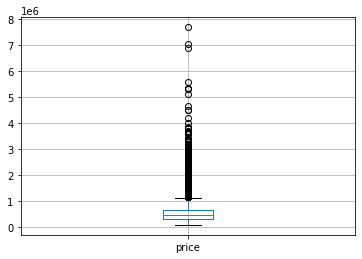

In [6]:
# drop homes that have price 4 standard deviations away from mean
df.boxplot(['price'])

mean = df.price.mean()
std = df.price.std()

df = df[(df.price < (mean + (4 * std))) & (df.price > (mean - (4 * std)))]


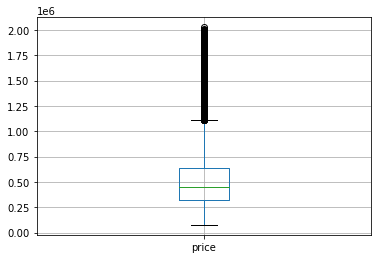

In [7]:
df.boxplot(['price'])

In [8]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floor_round,bath_round
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2.0,2.0
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,1.0,3.0
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2.0,2.0
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2.0,4.0
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2.0,2.0


In [9]:
# Changing date column type to pandas datetime
df.date  = pd.to_datetime(df.date)
df['age_when_sold'] = pd.DatetimeIndex(df['date']).year - df['yr_built']


In [10]:
#your code here
df['age'] = 2016 - df['yr_built']
df['updated'] = np.where(df.yr_renovated > 1, 1,0)
df['new_house'] = np.where(df.yr_built > 2000, 1, 0)
